In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from statsmodels.tools import eval_measures
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

/Users/hyunjaecho/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print len(df.columns)
print df.columns

81
Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinis

# Step 1. Clean up the dataset.
Drop the columns with NaN and categorical data types.

In [4]:
df = df.dropna(axis=1, how="any")
print len(df.columns)
print df.columns

62
Index([u'Id', u'MSSubClass', u'MSZoning', u'LotArea', u'Street', u'LotShape',
       u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'ExterQual', u'ExterCond', u'Foundation',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating',
       u'HeatingQC', u'CentralAir', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'GarageCars',
       u'GarageArea', u'PavedDrive', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SaleType', u'SaleCondition', u'SalePrice']

# Now, our dataset only contains numerical data, which is easier to work with.

In [5]:
# df_num = df.select_dtypes(include=[np.number])
df_num = df.select_dtypes(include=[np.float, np.int])
df_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
df_num.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Step 2. Divide the dataset into Train and Test sets.

In [7]:
# Train and Test

X = df_num
X = X.drop("SalePrice", axis=1)
y = df_num.SalePrice

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [9]:
x_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1153,1154,30,5890,6,8,1930,2007,538,0,278,...,432,0,0,96,0,0,0,0,6,2008
717,718,20,10000,5,6,1973,2000,1084,0,92,...,439,224,0,0,0,0,0,0,11,2008
354,355,50,8400,6,5,1940,2000,388,0,552,...,240,0,0,108,0,0,0,0,6,2006
777,778,20,13350,5,5,1974,1974,762,0,102,...,440,241,0,0,0,0,0,0,6,2006
1327,1328,20,6600,5,9,1982,2008,641,0,175,...,264,0,0,0,0,0,0,0,10,2008


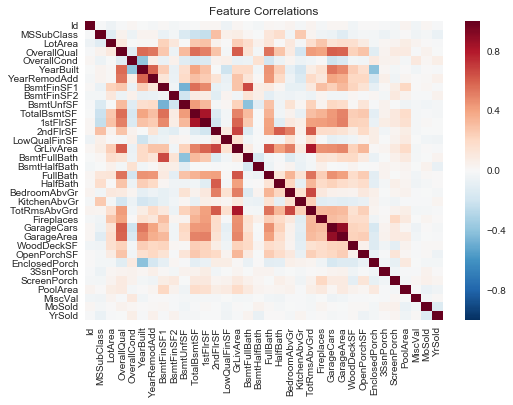

In [10]:
x_train_correlations = x_train.corr()
x_train_corr_heat = sns.heatmap(x_train_correlations)
plt.title('Feature Correlations')
plt.show()

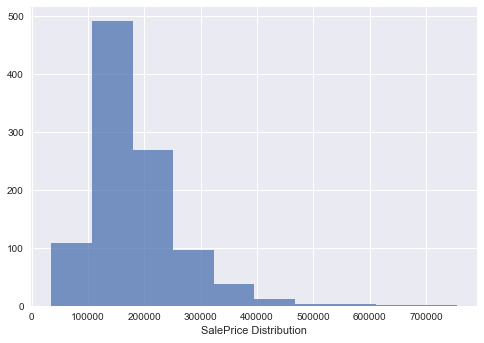

In [11]:
plt.hist(y_train, alpha=0.75)
plt.xlabel("SalePrice Distribution")
plt.show()

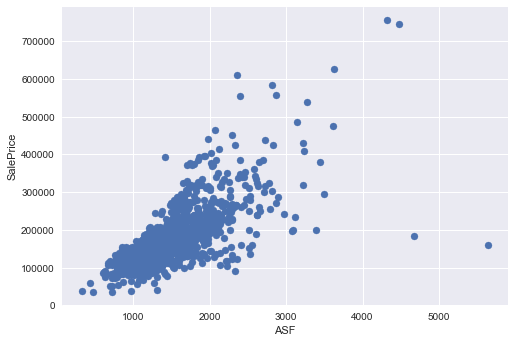

In [12]:
plt.scatter(x=x_train['GrLivArea'], y=y_train)
plt.ylabel('SalePrice')
plt.xlabel('ASF')
plt.show()

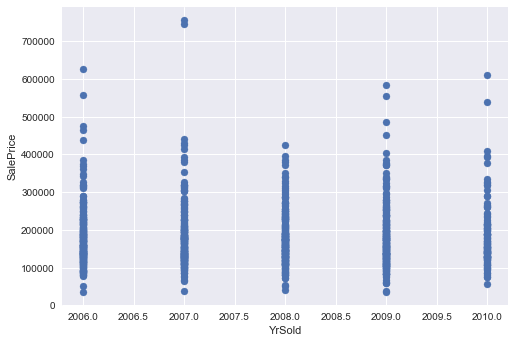

In [13]:
plt.scatter(x=x_train['YrSold'], y=y_train)
plt.ylabel('SalePrice')
plt.xlabel('YrSold')
plt.show()

In [14]:
print x_train.shape, x_test.shape, y_train.shape, y_test.shape

(1022, 34) (438, 34) (1022,) (438,)


# Models: Linear Regression, Ridge Regression, Lasso Regression, Random Forest, and XG Boost.

Mean absolute error: 21341.3654704


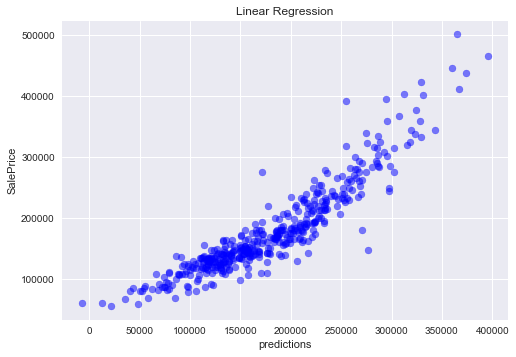

In [15]:
model = linear_model.LinearRegression(normalize=True).fit(x_train, y_train)

predictions = model.predict(x_test)

sc = eval_measures.meanabs(predictions, y_test)
print "Mean absolute error:", sc

plt.scatter(predictions, y_test, alpha=0.5, color='b')
plt.xlabel("predictions")
plt.ylabel('SalePrice')
plt.title('Linear Regression')

plt.show()

('Mean absolute error:', 21006.628320388951)


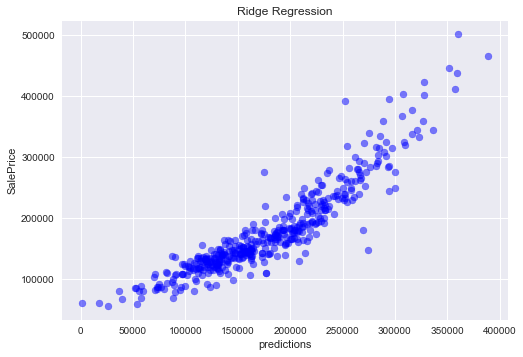

In [16]:
ridge = linear_model.RidgeCV(alphas=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001], normalize=True)
ridge.fit(x_train,y_train)
predictions = ridge.predict(x_test)
print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

plt.scatter(predictions, y_test, alpha=0.5, color='b')
plt.xlabel("predictions")
plt.ylabel('SalePrice')
plt.title('Ridge Regression')

plt.show()

('Mean absolute error:', 21298.932150340333)


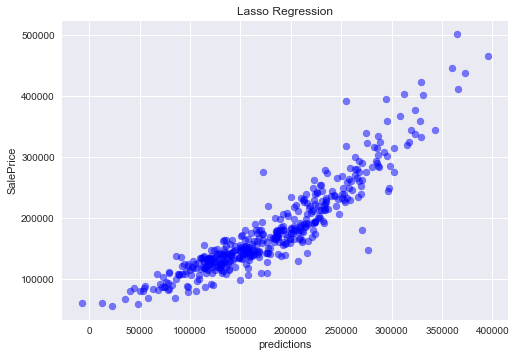

In [17]:
lass = linear_model.LassoCV(alphas=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001], normalize=True)
lass.fit(x_train,y_train)
predictions = lass.predict(x_test)
print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

plt.scatter(predictions, y_test, alpha=0.5, color='b')
plt.xlabel("predictions")
plt.ylabel('SalePrice')
plt.title('Lasso Regression')

plt.show()

('Mean absolute error:', 25878.538812785388)


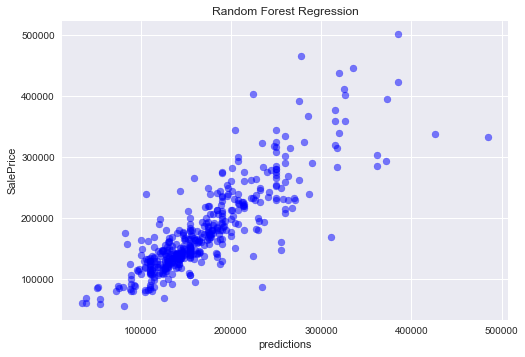

In [18]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=1)
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

plt.scatter(predictions, y_test, alpha=0.5, color='b')
plt.xlabel("predictions")
plt.ylabel('SalePrice')
plt.title('Random Forest Regression')

plt.show()

In [19]:
rf_feature_importances_ = clf.feature_importances_

# Order of features that affected the prices the most for Random Forest:

In [20]:
feature_order = []
feature_index_order = np.argsort(rf_feature_importances_)

for index in feature_index_order:
    feature_order.append(x_train.columns.tolist()[index])


print "Features' importance in order: \n"
print feature_order

Features' importance in order: 

['PoolArea', '3SsnPorch', 'KitchenAbvGr', 'LowQualFinSF', 'BsmtHalfBath', 'MiscVal', 'FullBath', 'HalfBath', 'ScreenPorch', 'BsmtFullBath', 'GarageCars', 'EnclosedPorch', 'BsmtFinSF2', 'Fireplaces', 'BedroomAbvGr', 'MSSubClass', 'OverallCond', 'OverallQual', '2ndFlrSF', 'TotRmsAbvGrd', 'YrSold', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1', 'YearRemodAdd', 'MoSold', 'YearBuilt', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'LotArea', 'GrLivArea', 'Id']


# Currently, Jupyter Notebook doesn't support XG Boost. Running it on a different text editor will yield mean absolute error for XG Boost to be around 15300, which tops all the models above.

In [21]:
# import xgboost as xgb

# y = y_train
# X = x_train
# xgb_model = xgb.XGBRegressor().fit(X,y)
# predictions = xgb_model.predict(x_test)
# print(eval_measures.meanabs(y_test, predictions))
# 15307.9837507

# The more features we use, the higher the variance is. This indicates overfitting. Use PCA (Principal Component Analysis) for dimensioinality reduction (reducing the number of features to avoid overfitting).

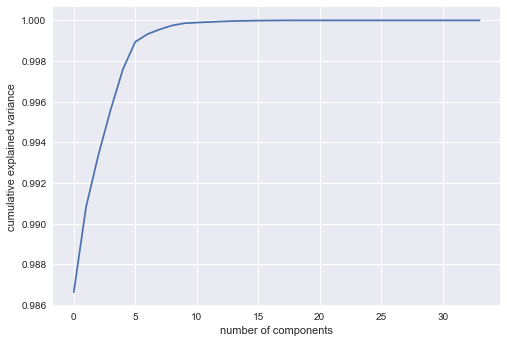

In [22]:
# plt.plot(pca.explained_variance_ratio_.cumsum())
# plt.xlabel("# features")
# plt.ylabel('Cumulative explained variance')
# plt.show()


pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# The graph above indicates that we need about 5 features to retain 99.9% of the variance. Which 5 features?

In [23]:
# Create and fit selector
selector = SelectKBest(k=5)
selector.fit(x_train, y_train)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
features_selected = x_train.columns[idxs_selected]
features_selected

Index([u'LotArea', u'OverallQual', u'GrLivArea', u'GarageArea', u'MiscVal'], dtype='object')

# Indeed, Ridge regression using only these 5 features results in a reasonable mean absolute error (24655 compared to 21006).

In [24]:
x_train_five = x_train[['LotArea', 'OverallQual', 'GrLivArea', 'GarageArea', 'MiscVal']].copy()
x_test_five = x_test[['LotArea', 'OverallQual', 'GrLivArea', 'GarageArea', 'MiscVal']].copy()

('Mean absolute error:', 24655.416351409356)


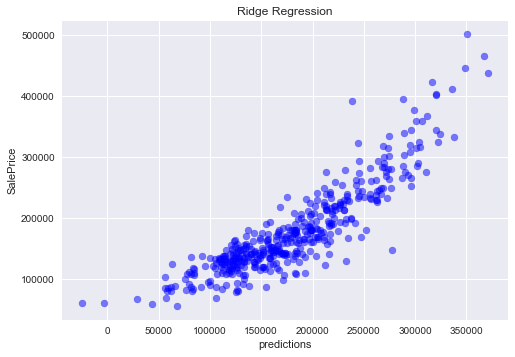

In [25]:
reg = linear_model.RidgeCV(alphas=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001], normalize=True)
reg.fit(x_train_five,y_train)
predictions = reg.predict(x_test_five)
print("Mean absolute error:", eval_measures.meanabs(predictions, y_test))

plt.scatter(predictions, y_test, alpha=0.5, color='b')
plt.xlabel("predictions")
plt.ylabel('SalePrice')
plt.title('Ridge Regression')

plt.show()